<a href="https://colab.research.google.com/github/Nihad-AO/insurancedata/blob/master/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
data=pd.read_csv('/content/drive/My Drive/colab datas/titanic train.csv')

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

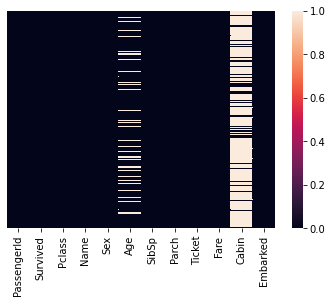

In [17]:
sns.heatmap(data.isnull(),yticklabels=False)
#this will give us the information that which of the column have more NAN values

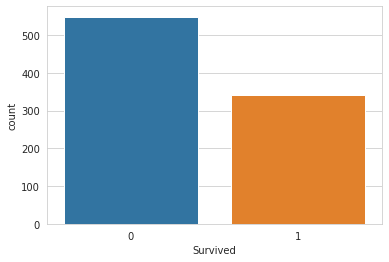

In [18]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=data)
#0 indicate person cannot survive 
#1 indicate person can survive

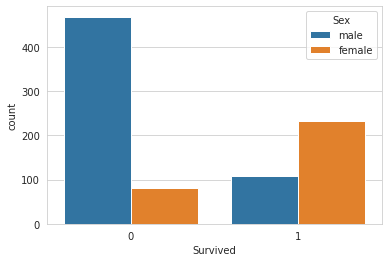

In [19]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Sex',data=data)
# most of people not suvived are male 
# most of the people survived are female

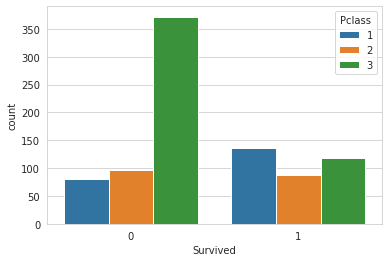

In [20]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Pclass',data=data)

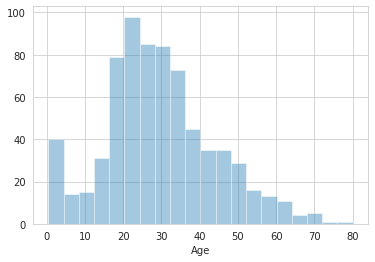

In [21]:
sns.distplot(data['Age'].dropna(),kde=False)
#we saw that many of the details in age is NAN so, we need to give 'dropna' from avoiding the error

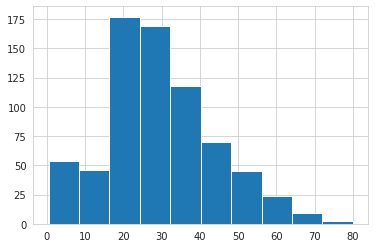

In [22]:
data['Age'].hist()

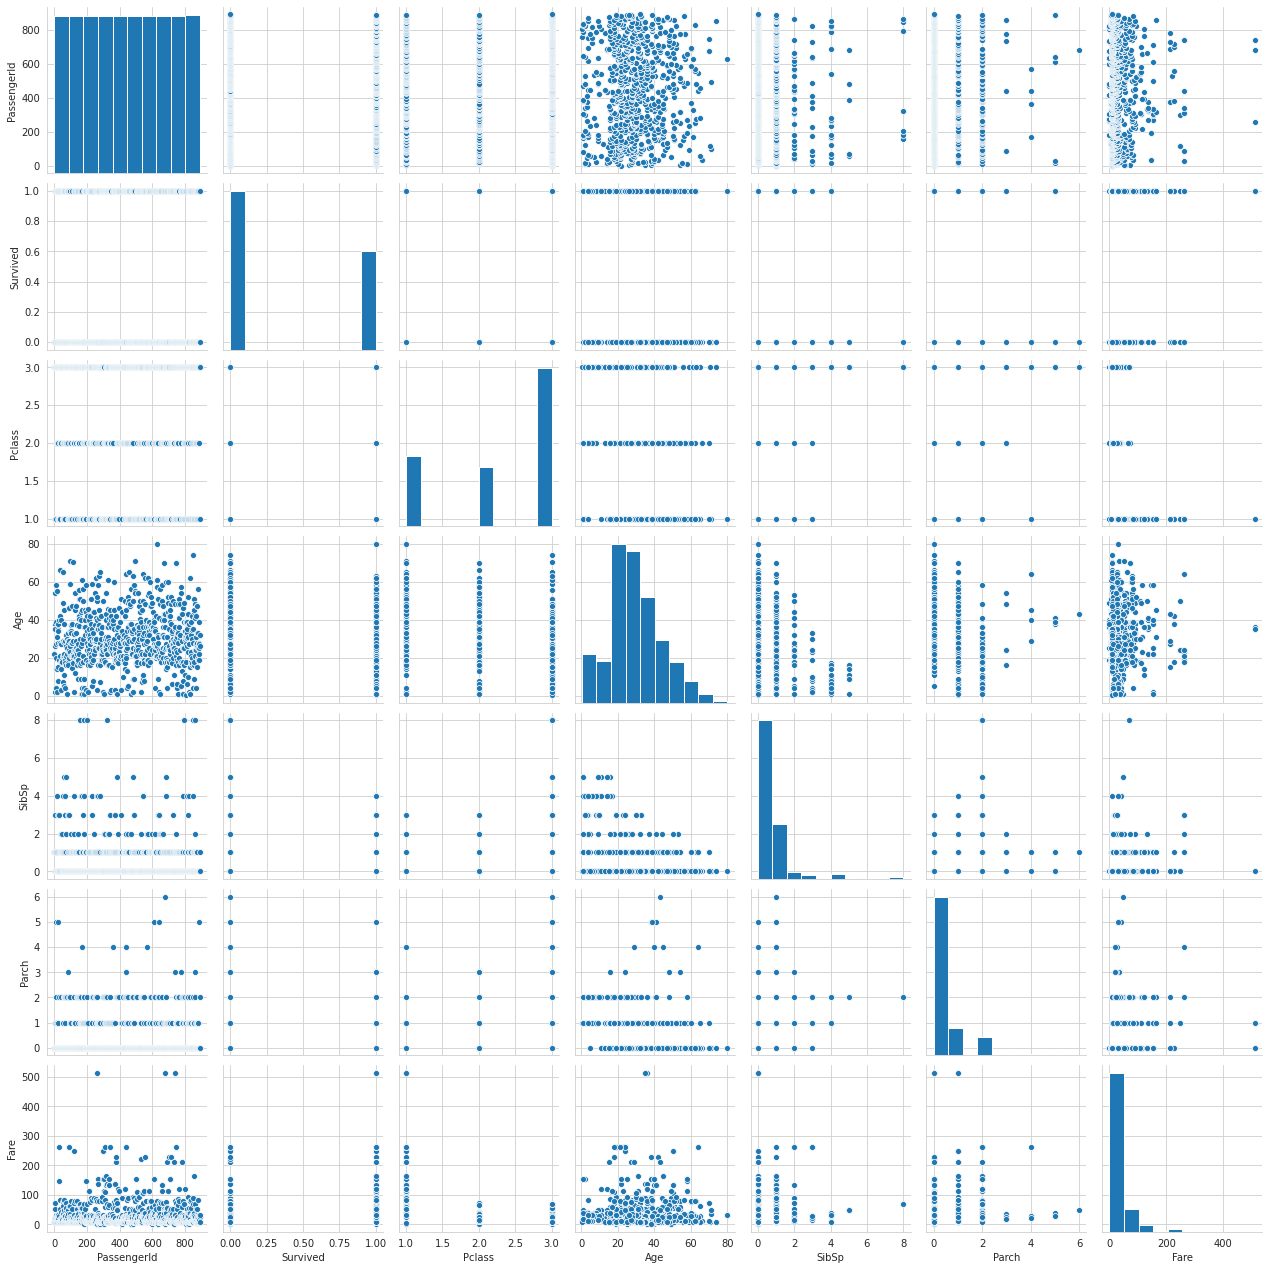

In [23]:
sns.pairplot(data)

# DATA CLEANING

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
data=pd.read_csv('/content/drive/My Drive/colab datas/titanic train.csv')

In [27]:
data.shape


(891, 12)

In [28]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

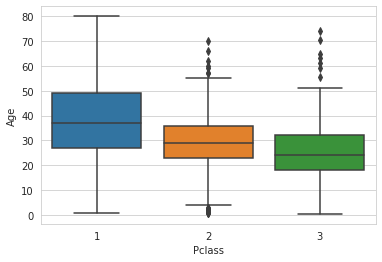

In [29]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [30]:
def rectifie(colmn):
    Age=colmn[0]
    Pclass=colmn[1]
    if pd.isnull(Age):
        if Pclass is 1:
            return 37
        if Pclass is 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
data['Age']=data[['Age','Pclass']].apply(rectifie,axis=1)

In [32]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

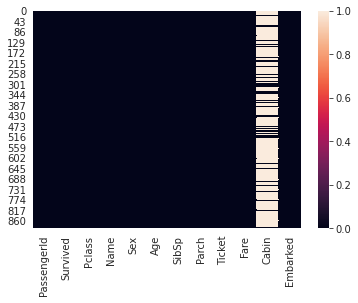

In [34]:
sns.heatmap(data.isnull())

In [35]:
data=data.drop('Cabin',axis=1)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


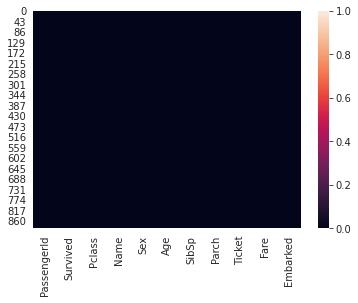

In [37]:
sns.heatmap(data.isnull())

In [38]:
data=data.drop(['Name','Ticket','PassengerId'],axis=1)

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [41]:
data=data.drop(['Sex','Embarked'],axis=1)

In [42]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [45]:
data=pd.concat([data,sex,embark],axis=1)
# to concatinate three datas ie, data+sex+embark


In [46]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# ANOTHER METHOD BUT DO NOT GET ACCURATE RESULT

In [ ]:
#x=data['Age']
#y=data.drop('Age',axis=1)

In [ ]:
#x=x.fillna(x.mean())

In [ ]:
#d2=pd.concat([x,y],axis=1)

In [ ]:
#d2.head()

In [ ]:
#sns.heatmap(d2.isnull())

# BUILD A LOGISTIC REGRESSION MODEL

In [47]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [48]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [52]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction=lg.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
accuracy=confusion_matrix(y_test,prediction)

In [56]:
accuracy

array([[136,  21],
       [ 31,  80]])

In [57]:
accuracy_score=accuracy_score(y_test,prediction)

In [58]:
accuracy_score

0.8059701492537313

In [59]:
score=lg.score(x_test,y_test)

In [60]:
score

0.8059701492537313